In [1]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch


In [2]:
figsize = (10, 8)

# Alzheimer

In [3]:
import ast
ae_metrics = pd.read_excel('metrics_bernn_5models.xlsx', sheet_name='alzheimer metrics values', index_col='model name')
# ae_metrics.drop(columns=['model name'], inplace=True)
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics

,Batch entropy,ARI,AMI,QC dist / total dist,qc aPCC
model name,,,,,
raw,[1.973757],[0.04242],[0.134557],[1.049893],[0.653097]
minmax,[1.952406],[0.035962],[0.168424],[0.955373],[0.554029]
minmax_per_batch,[1.999605],[0.108159],[0.240812],[3.261474],[0.171413]
standard,[1.968121],[0.02511],[0.114335],[0.82247],[0.328629]
standard_per_batch,[2.242627],[0.00728],[0.03137],[3.582448],[0.225515]
robust,[1.946204],[0.045668],[0.154156],[1.137376],[0.19519]
robust_per_batch,[2.196456],[-0.000805],[0.010397],[1.747916],[0.196446]
combat,[2.337022],[0.001292],[0.000951],[0.958292],[-0.018158]
pycombat,[2.073872],[0.010479],[0.025512],[0.871237],[0.772163]


In [4]:
import ast
ae_metrics = pd.read_excel('metrics_bernn_5models.xlsx', sheet_name='alzheimer metrics values', index_col='model name')
# ae_metrics.drop(columns=['model name'], inplace=True)
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'Batch entropy'] = [(np.log(21) - x)/np.log(21) for x in ae_metrics.loc[:, 'Batch entropy']]
ae_metrics.loc[:, 'qc aPCC'] = [[1 - xx for xx in x] for x in ae_metrics.loc[:, 'qc aPCC']]
ae_metrics = ae_metrics.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]
ae_metrics['model name'] = ae_metrics.index
model_names = ae_metrics['model name'].tolist()
ae_metrics

,Batch entropy,ARI,AMI,QC dist / total dist,qc aPCC,model name
model name,,,,,,
raw,[0.3517022651749942],[0.04242],[0.134557],[1.049893],[0.34690299999999996],raw
robust,[0.36075228880385696],[0.045668],[0.154156],[1.137376],[0.80481],robust
robust_per_batch,[0.27855483251342844],[-0.000805],[0.010397],[1.747916],[0.803554],robust_per_batch
combat,[0.23238470144186701],[0.001292],[0.000951],[0.958292],[1.018158],combat
harmony,[0.2257353827345503],[0],[0],[0.765994],[0.96568],harmony
waveica,[0.3306812343535377],[0.009934],[0.022159],[0.783781],[0.122591],waveica
normae,"[0.2747959507071385, 0.27512440944589156, 0.27...","[0.0391, 0.0333, 0.041, 0.0109, 0.0585]","[0.1056, 0.1068, 0.1073, 0.1036, 0.1046]","[0.1911, -0.1317, 0.1717, 0.4448, 0.3063]","[0.07269999999999999, 0.1078, 0.11709999999999...",normae
AE-DANN,"[0.27069021647272534, 0.2430011447958432, 0.27...","[0.0471, 0.0619, 0.0305, 0.062, 0.0753]","[0.1526, 0.1615, 0.1541, 0.1639, 0.1632]","[0.5121, 0.5202, 0.4898, 0.524, 0.5242]","[0.3425, 0.2541, 0.18989999999999996, 0.3668, ...",AE-DANN
AE-invTriplet,"[0.27706231600453457, 0.2992332808703655, 0.26...","[0.0392, 0.0333, 0.0261, 0.0385, 0.0394]","[0.0999, 0.0963, 0.1062, 0.1029, 0.1033]","[0.5948, 0.6467, 0.6127, 0.6142, 0.6062]","[0.5931, 0.6548, 0.6947, 0.626, 0.6623]",AE-invTriplet


In [5]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE": pd.concat((ae_metrics['Batch entropy'], ae_metrics['Batch entropy'])),
    "models": pd.concat((ae_metrics['model name'], ae_metrics['model name'])),
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model name']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model name']
})
df_qc = pd.DataFrame({
    "qc_dist": ae_metrics['QC dist / total dist'],
    "models": ae_metrics['model name']
})
df_apcc = pd.DataFrame({
    "qc_aPCC": ae_metrics['qc aPCC'],
    "models": ae_metrics['model name'],
})

lolims = [True for _ in range(len(df_be['models']))]

# df_be = df.reset_index()
# df_be = df.drop('index', 1)
# df = df.drop('level_0', 1)

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models', 'metric'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models', 'metric'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models', 'metric'])

df_qc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_qc.iloc[i]['qc_dist']).reshape([-1, 1]), 
        np.array([df_qc.iloc[i]['models']] * len(df_qc.iloc[i]['qc_dist'])).reshape([-1, 1]),
        np.array([['qc_dist'] * len(df_qc.iloc[i]['qc_dist'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_qc.shape[0])
]), columns=['value', 'models', 'metric'])

df_apcc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_apcc.iloc[i]['qc_aPCC']).reshape([-1, 1]), 
        np.array([df_apcc.iloc[i]['models']] * len(df_apcc.iloc[i]['qc_aPCC'])).reshape([-1, 1]),
        np.array([['qc_aPCC'] * len(df_apcc.iloc[i]['qc_aPCC'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_apcc.shape[0])
]), columns=['value', 'models', 'metric'])


df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]
df_qc.loc[:, 'value'] = [float(x) for x in df_qc.loc[:, 'value']]
df_apcc.loc[:, 'value'] = [float(x) for x in df_apcc.loc[:, 'value']]



/tmp/ipykernel_2402359/2243449270.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df_be, df_ari, df_ami), 0)
/tmp/ipykernel_2402359/2243449270.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

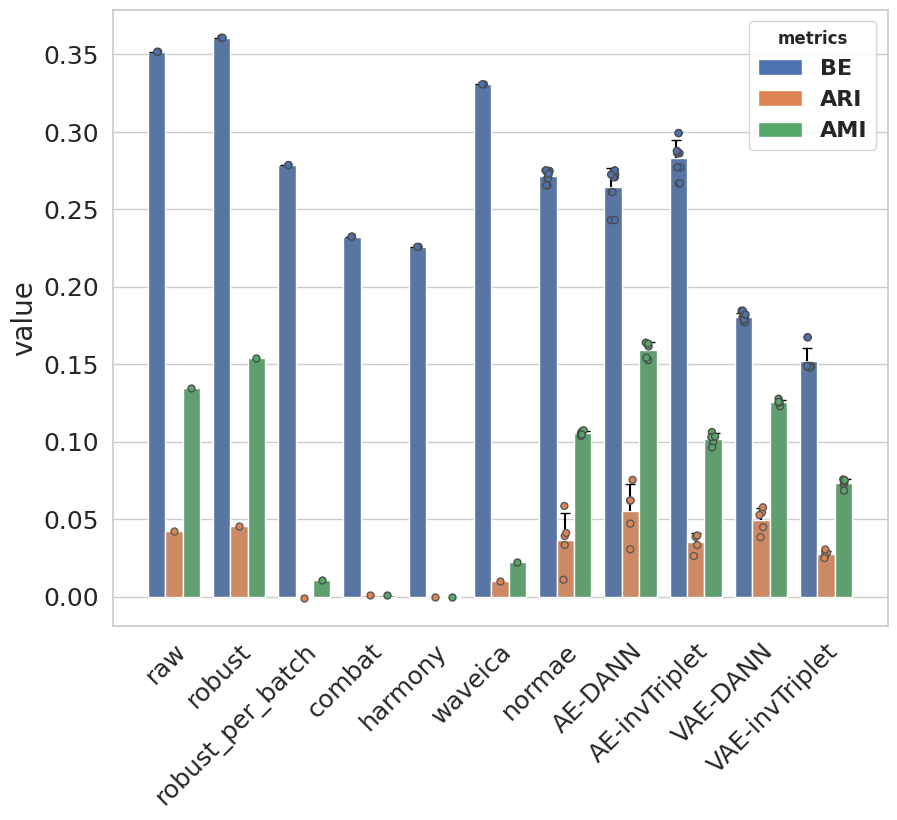

In [6]:
N = len(df_ari['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

df = pd.concat((df_be, df_ari, df_ami), 0)

sns.set(rc={'figure.figsize':figsize})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='value', 
    data=df, 
    hue='metric',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

lolims = [True for _ in range(len(model_names))]

for df, offset in zip([df_be, df_ari, df_ami], [-0.3, 0, 0.3]):
    
    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['value'].mean(), lolims=lolims,
                yerr=df.groupby(['models'], sort=False)['value'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("value",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['BE', "ARI", "AMI"], ['C0', 'C1', 'C2'])
]

g.legend(handles=handles, fontsize=16, title="metrics")


/tmp/ipykernel_2402359/3970668908.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df_apcc, df_qc), 0)
/tmp/ipykernel_2402359/3970668908.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

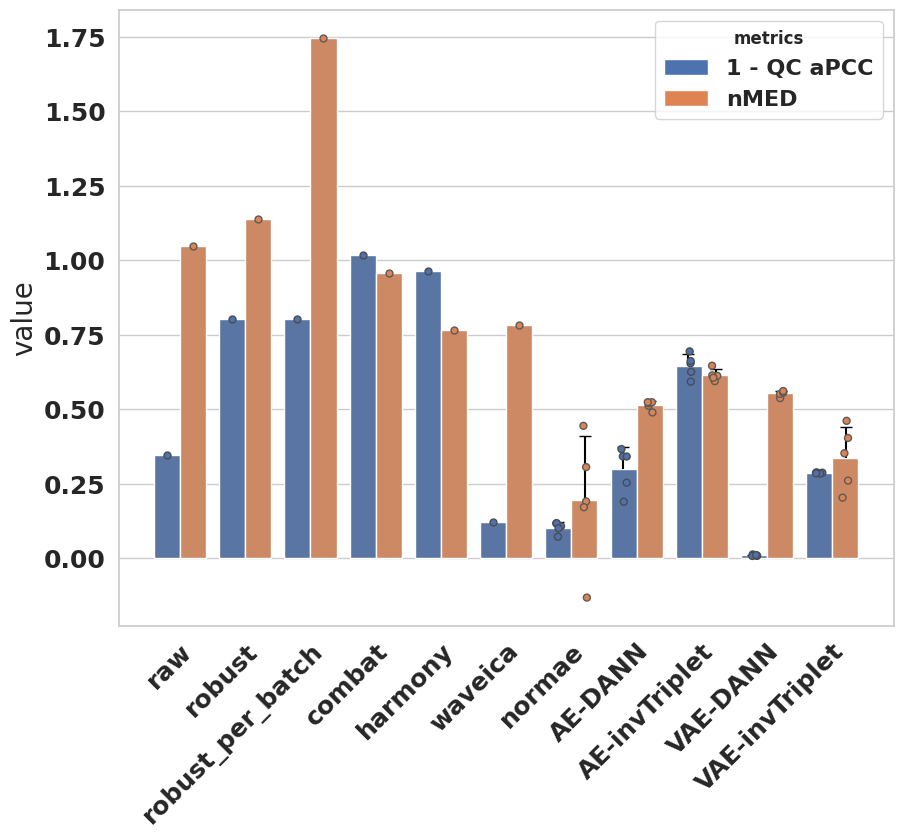

In [7]:
N = len(df_ari['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

df = pd.concat((df_apcc, df_qc), 0)

sns.set(rc={'figure.figsize':figsize})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='value', 
    data=df, 
    hue='metric',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

lolims = [True for _ in range(len(model_names))]

for df, offset in zip([df_apcc, df_qc], [-0.21, 0.21]):
    
    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['value'].mean(), lolims=lolims,
                yerr=df.groupby(['models'], sort=False)['value'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(9)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("value",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['1 - QC aPCC', "nMED"], ['C0', 'C1'])
]

g.legend(handles=handles, fontsize=16, title="metrics")
plt.show()


# Amide

In [8]:
import ast
ae_metrics = pd.read_excel('metrics_bernn_5models.xlsx', sheet_name='amide metrics values', index_col='Unnamed: 0')

# ae_metrics.drop(columns=['model name'], inplace=True)
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'BE'] = [(np.log(3) - x)/np.log(3) for x in ae_metrics.loc[:, 'BE']]
ae_metrics.loc[:, 'qc_aPCC'] = [[1 - xx for xx in x] for x in ae_metrics.loc[:, 'qc_aPCC']]
ae_metrics = ae_metrics.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]
ae_metrics['model name'] = ae_metrics.index
model_names = ae_metrics['model name'].tolist()


In [9]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE": pd.concat((ae_metrics['BE'], ae_metrics['BE'])),
    "models": pd.concat((ae_metrics['model name'], ae_metrics['model name'])),
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model name']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model name']
})
df_qc = pd.DataFrame({
    "qc_dist": ae_metrics['qc_dist/total_dist'],
    "models": ae_metrics['model name']
})
df_apcc = pd.DataFrame({
    "qc_aPCC": ae_metrics['qc_aPCC'],
    "models": ae_metrics['model name'],
})

lolims = [True for _ in range(len(df_be['models']))]

# df_be = df.reset_index()
# df_be = df.drop('index', 1)
# df = df.drop('level_0', 1)

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models', 'metric'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models', 'metric'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models', 'metric'])

df_qc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_qc.iloc[i]['qc_dist']).reshape([-1, 1]), 
        np.array([df_qc.iloc[i]['models']] * len(df_qc.iloc[i]['qc_dist'])).reshape([-1, 1]),
        np.array([['qc_dist'] * len(df_qc.iloc[i]['qc_dist'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_qc.shape[0])
]), columns=['value', 'models', 'metric'])

df_apcc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_apcc.iloc[i]['qc_aPCC']).reshape([-1, 1]), 
        np.array([df_apcc.iloc[i]['models']] * len(df_apcc.iloc[i]['qc_aPCC'])).reshape([-1, 1]),
        np.array([['qc_aPCC'] * len(df_apcc.iloc[i]['qc_aPCC'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_apcc.shape[0])
]), columns=['value', 'models', 'metric'])


df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]
df_qc.loc[:, 'value'] = [float(x) for x in df_qc.loc[:, 'value']]
df_apcc.loc[:, 'value'] = [float(x) for x in df_apcc.loc[:, 'value']]



/tmp/ipykernel_2402359/3183291006.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df_be, df_ari, df_ami), 0)
/tmp/ipykernel_2402359/3183291006.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

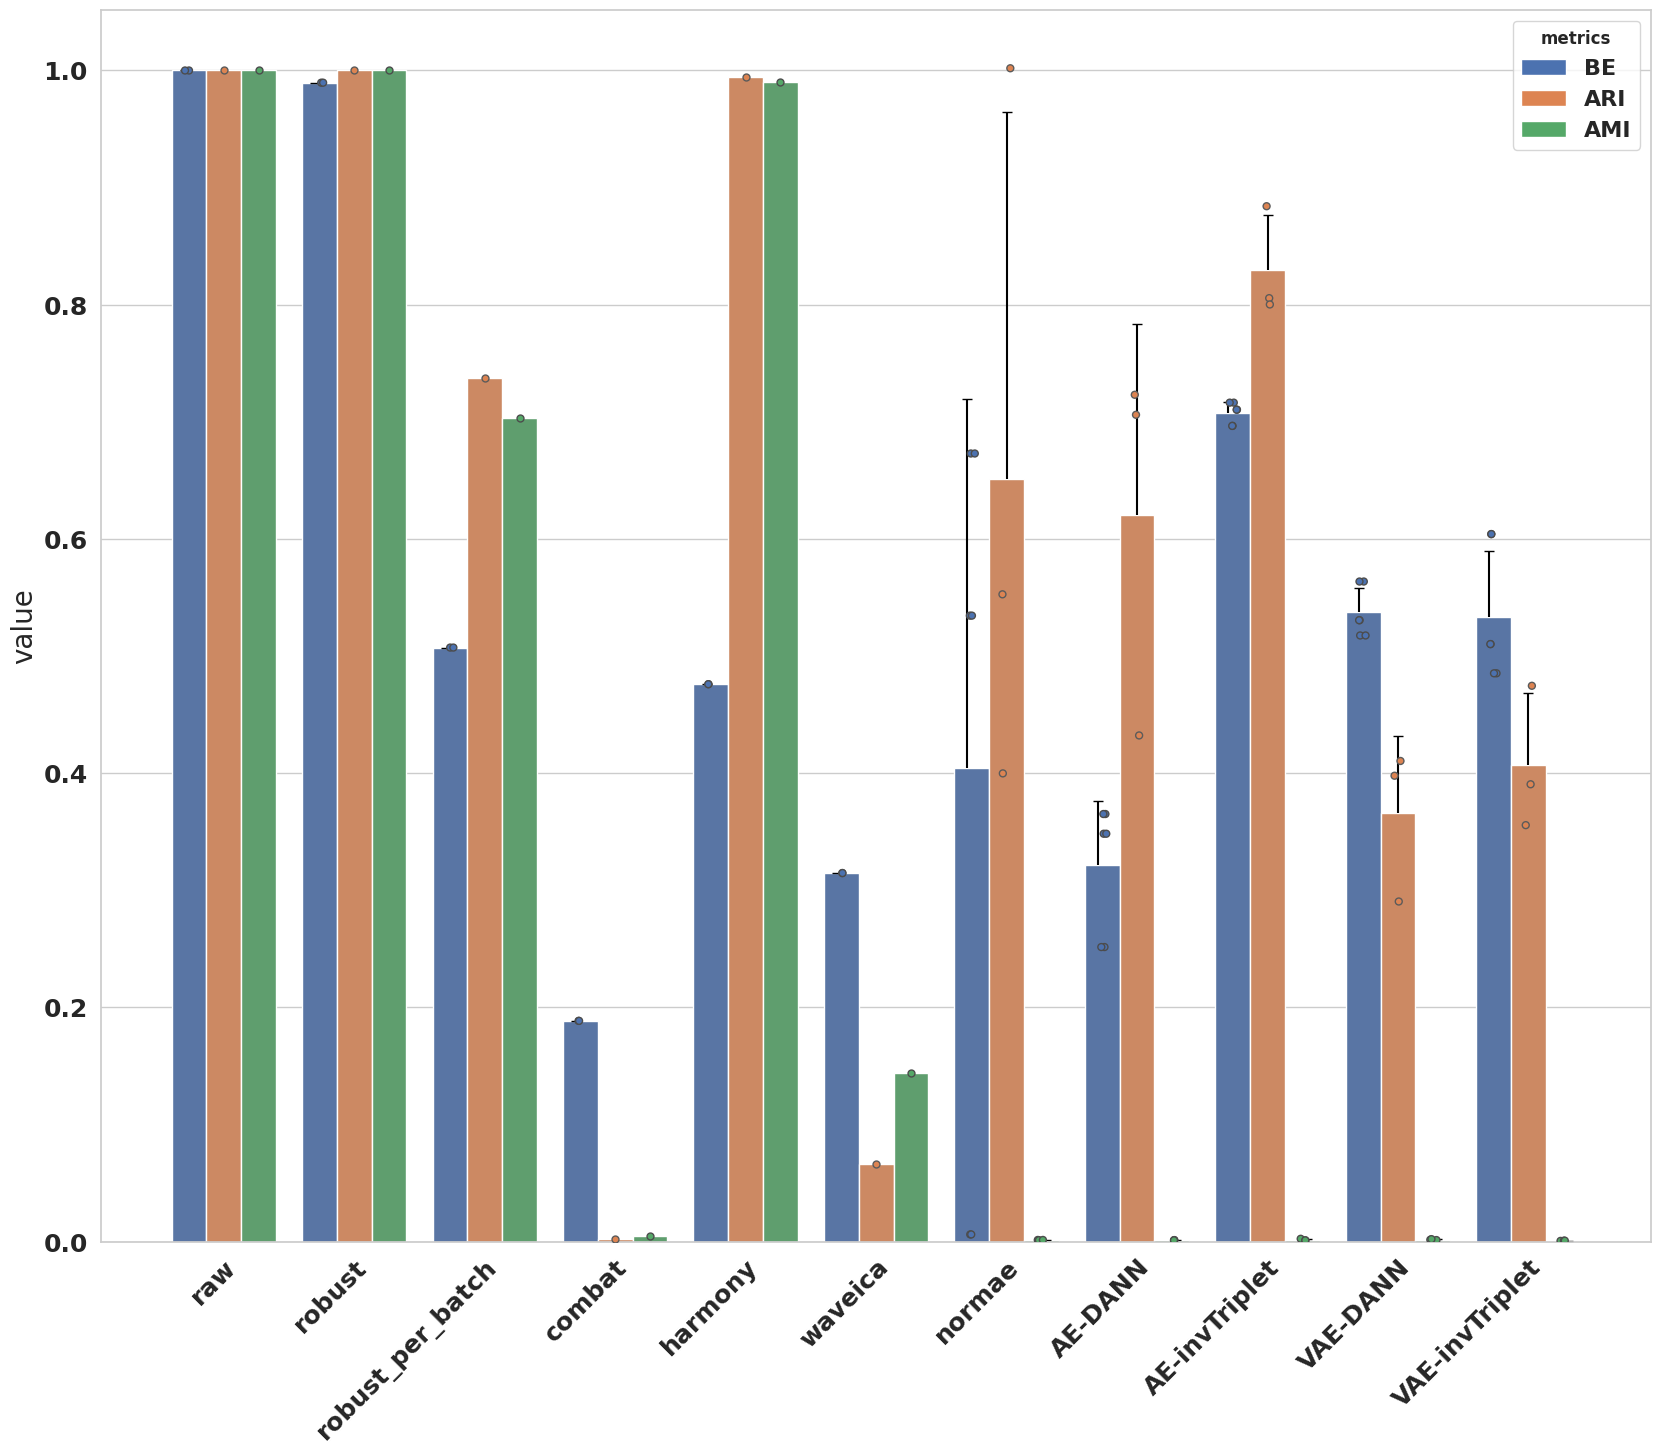

In [10]:
N = len(df_ari['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

df = pd.concat((df_be, df_ari, df_ami), 0)

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='value', 
    data=df, 
    hue='metric',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

lolims = [True for _ in range(len(model_names))]

for df, offset in zip([df_be, df_ari, df_ami], [-0.3, 0, 0.3]):
    
    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['value'].mean(), lolims=lolims,
                yerr=df.groupby(['models'], sort=False)['value'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("value",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['BE', "ARI", "AMI"], ['C0', 'C1', 'C2'])
]

g.legend(handles=handles, fontsize=16, title="metrics")


/tmp/ipykernel_2402359/3380040636.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df_apcc, df_qc), 0)
/tmp/ipykernel_2402359/3380040636.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

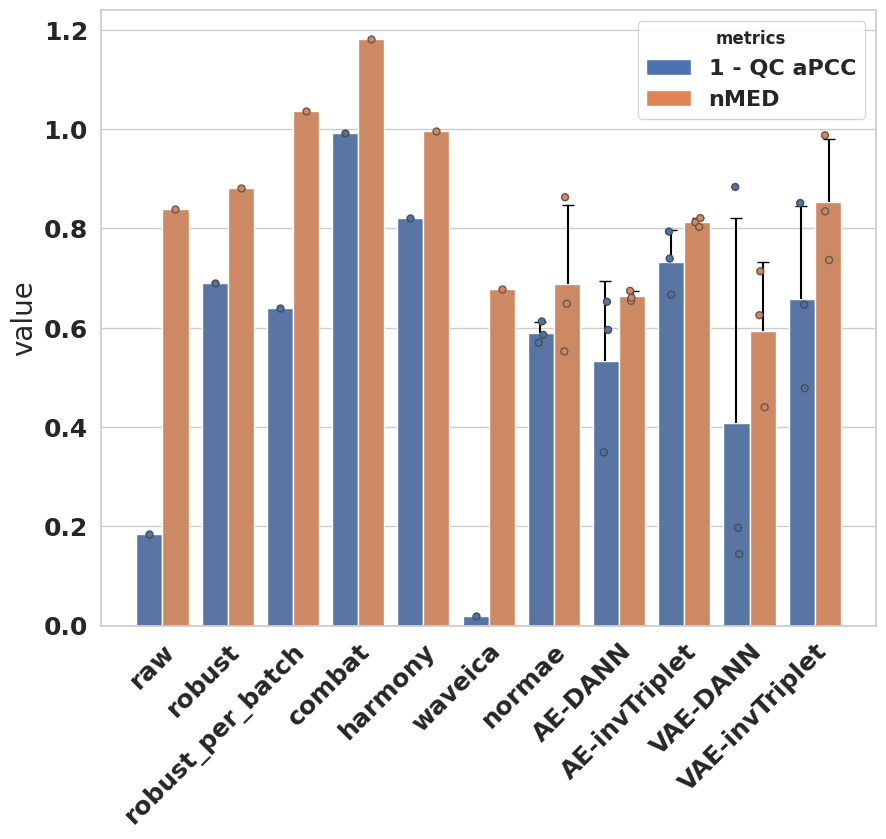

In [11]:
N = len(df_ari['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

df = pd.concat((df_apcc, df_qc), 0)

sns.set(rc={'figure.figsize':figsize})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='value', 
    data=df, 
    hue='metric',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

lolims = [True for _ in range(len(model_names))]

for df, offset in zip([df_apcc, df_qc], [-0.21, 0.21]):
    
    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['value'].mean(), lolims=lolims,
                yerr=df.groupby(['models'], sort=False)['value'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(9)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("value",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

# plt.legend(title='Metrics', loc='upper right', labels=['1 - QC aPCC', 'nMED'], fontsize=14)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['1 - QC aPCC', 'nMED'], ['C0', 'C1', 'C2'])
]

g.legend(handles=handles, fontsize=16, title="metrics")
plt.show()


# Mice

In [12]:
import ast
ae_metrics = pd.read_excel('metrics_bernn_5models.xlsx', sheet_name='mice metrics values', index_col='Unnamed: 0')

# ae_metrics.drop(columns=['model name'], inplace=True)
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'BE'] = [(np.log(7) - x)/np.log(7) for x in ae_metrics.loc[:, 'BE']]
ae_metrics = ae_metrics.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]
ae_metrics['model name'] = ae_metrics.index
model_names = ae_metrics['model name'].tolist()


In [13]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE": pd.concat((ae_metrics['BE'], ae_metrics['BE'])),
    "models": pd.concat((ae_metrics['model name'], ae_metrics['model name'])),
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model name']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model name']
})

lolims = [True for _ in range(len(df_be['models']))]

# df_be = df.reset_index()
# df_be = df.drop('index', 1)
# df = df.drop('level_0', 1)

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models', 'metric'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models', 'metric'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models', 'metric'])


df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]



/tmp/ipykernel_2402359/2315289374.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df_be, df_ari, df_ami), 0)
/tmp/ipykernel_2402359/2315289374.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

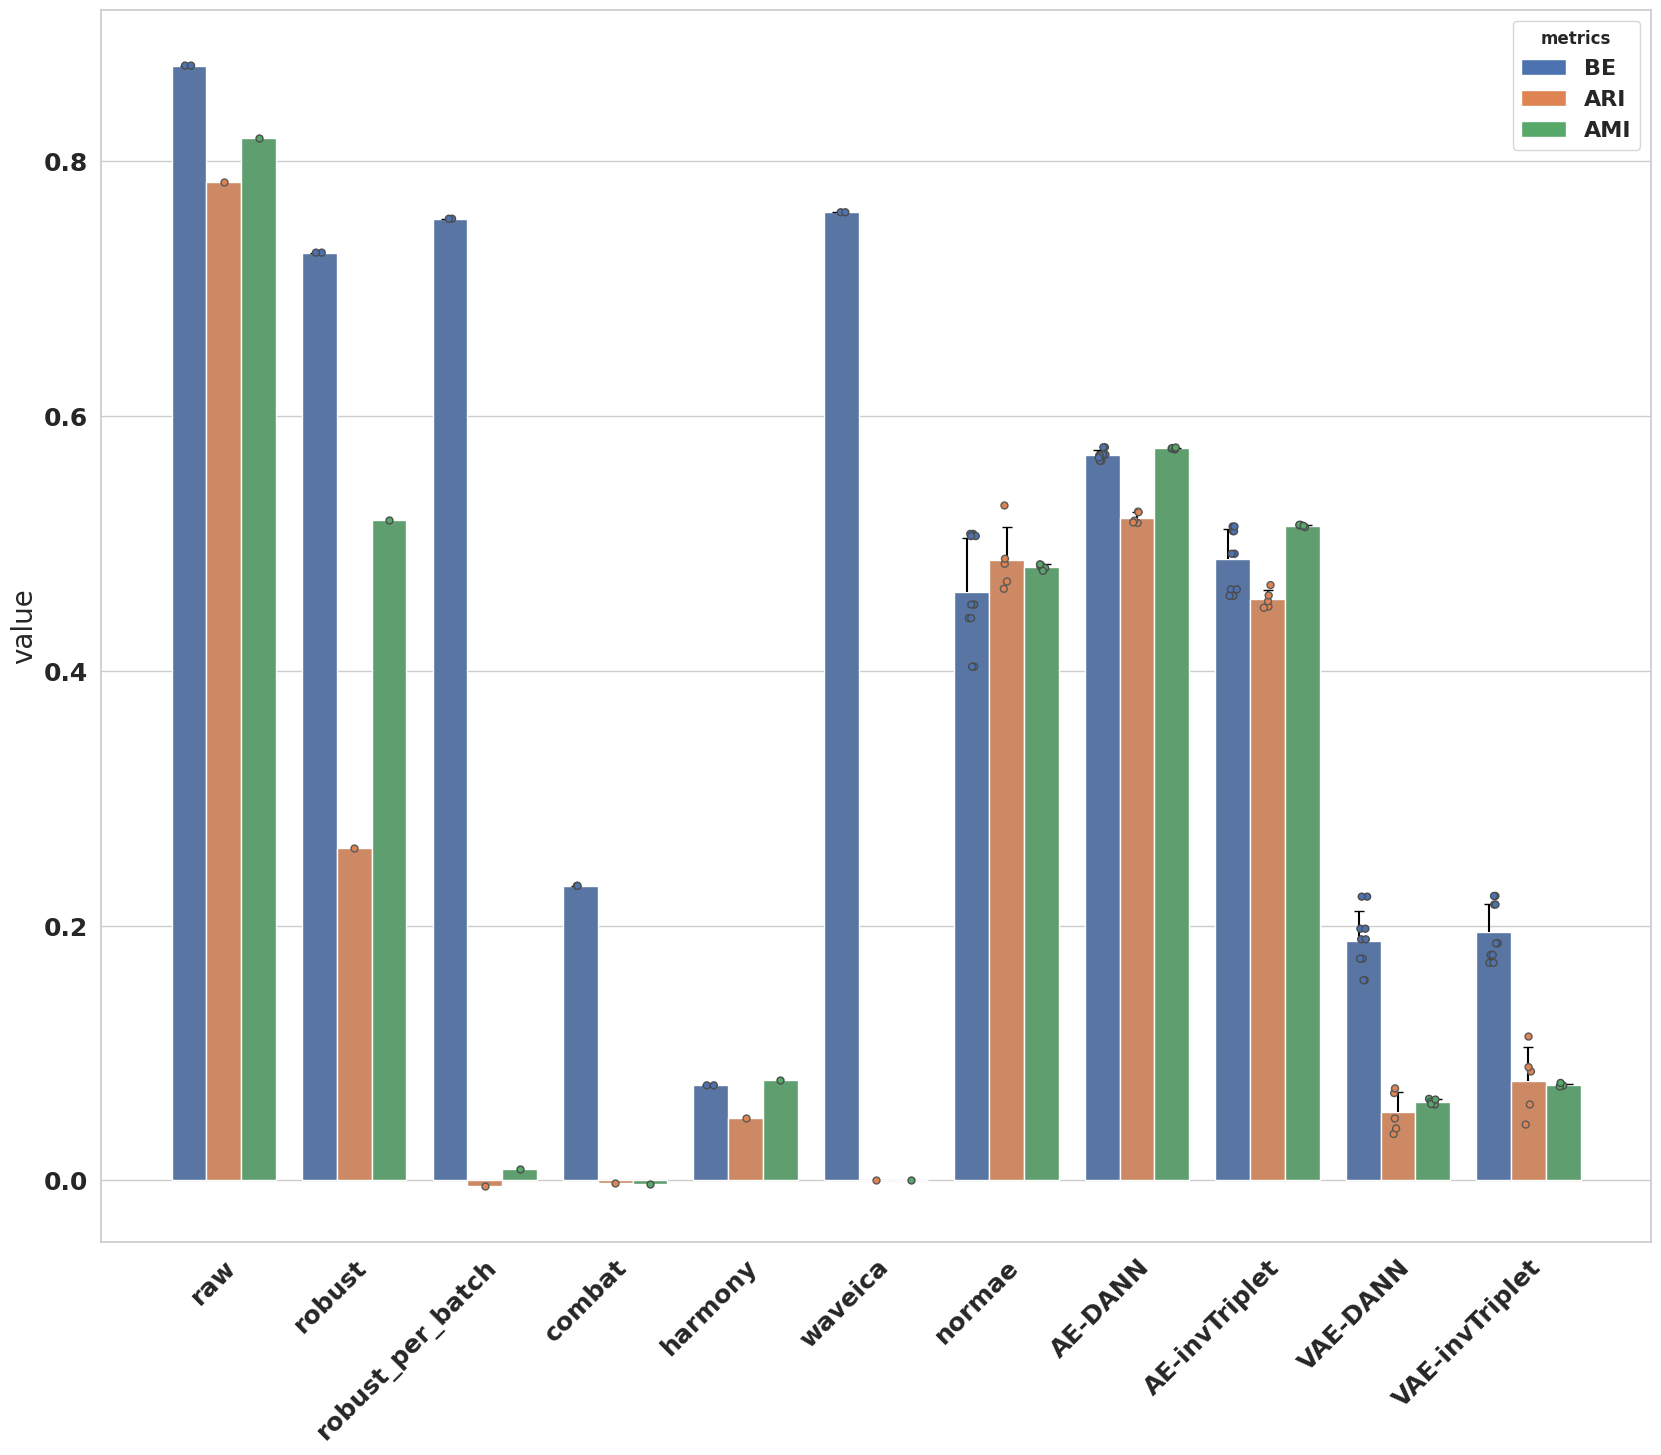

In [14]:
N = len(df_ari['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

df = pd.concat((df_be, df_ari, df_ami), 0)

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='value', 
    data=df, 
    hue='metric',
    dodge=True,
    linewidth=1
    
)
# g.legend_.remove()
h, l = g.get_legend_handles_labels() 
g.set_xticklabels(rotation=90, labels=model_names)

lolims = [True for _ in range(len(model_names))]

for df, offset in zip([df_be, df_ari, df_ami], [-0.3, 0, 0.3]):
    
    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['value'].mean(), lolims=lolims,
                yerr=df.groupby(['models'], sort=False)['value'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("value",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)
# handles = [plt.Rectangle((0,0),1,1) for _ in ['nBE', 'ARI', 'AMI']]
handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['BE', "ARI", "AMI"], ['C0', 'C1', 'C2'])
]

g.legend(handles=handles, fontsize=16, title="metrics")



/tmp/ipykernel_2402359/3970668908.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df_apcc, df_qc), 0)
/tmp/ipykernel_2402359/3970668908.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

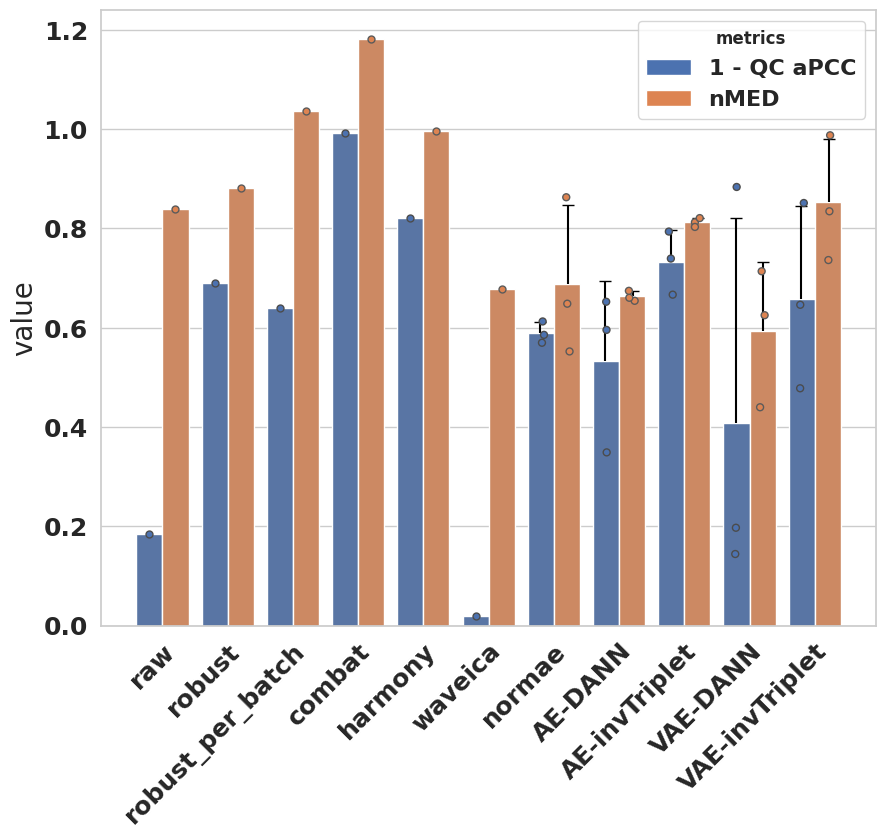

In [15]:
N = len(df_ari['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

df = pd.concat((df_apcc, df_qc), 0)

sns.set(rc={'figure.figsize':figsize})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='value', 
    data=df, 
    hue='metric',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

lolims = [True for _ in range(len(model_names))]

for df, offset in zip([df_apcc, df_qc], [-0.21, 0.21]):
    
    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['value'].mean(), lolims=lolims,
                yerr=df.groupby(['models'], sort=False)['value'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(9)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("value",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['1 - QC aPCC', "nMED"], ['C0', 'C1'])
]

g.legend(handles=handles, fontsize=16, title="metrics")
plt.show()


# Benchmark

In [16]:
import ast
ae_metrics = pd.read_excel('metrics_bernn_5models.xlsx', sheet_name='Benchmark metrics values', index_col='model')

# ae_metrics.drop(columns=['model name'], inplace=True)
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'Batch entropy'] = [(np.log(7) - x)/np.log(7) for x in ae_metrics.loc[:, 'Batch entropy']]
ae_metrics = ae_metrics.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]
ae_metrics['model name'] = ae_metrics.index
model_names = ae_metrics['model name'].tolist()


In [17]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE": pd.concat((ae_metrics['Batch entropy'], ae_metrics['Batch entropy'])),
    "models": pd.concat((ae_metrics['model name'], ae_metrics['model name'])),
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model name']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model name']
})

lolims = [True for _ in range(len(df_be['models']))]

# df_be = df.reset_index()
# df_be = df.drop('index', 1)
# df = df.drop('level_0', 1)

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models', 'metric'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models', 'metric'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models', 'metric'])


df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]



/tmp/ipykernel_2402359/2228009941.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df_be, df_ari, df_ami), 0)
/tmp/ipykernel_2402359/2228009941.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

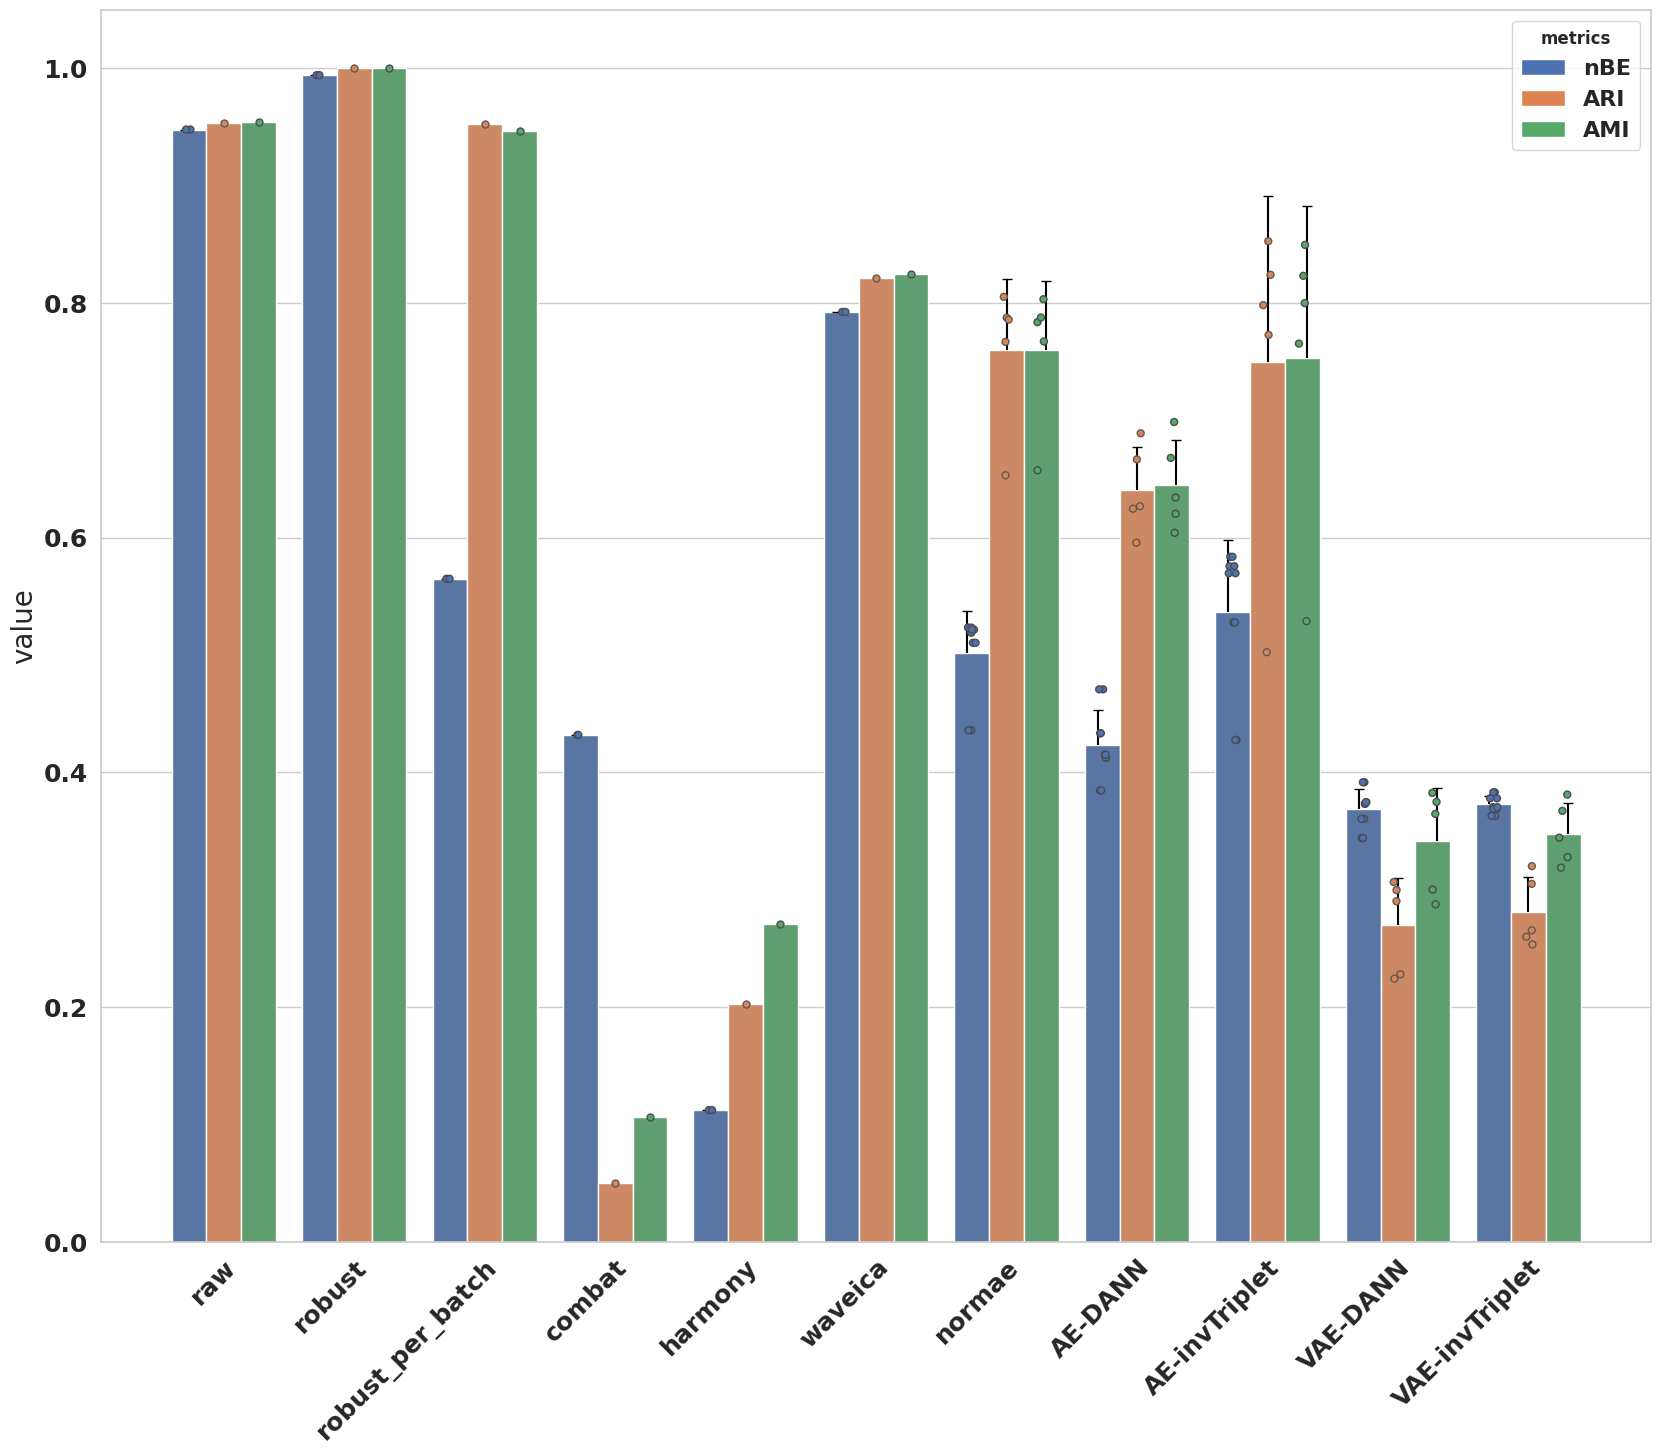

In [18]:
N = len(df_ari['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

df = pd.concat((df_be, df_ari, df_ami), 0)

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='value', data=df, ci=None, hue='metric')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='value', 
    data=df, 
    hue='metric',
    dodge=True,
    linewidth=1
    
)
# g.legend_.remove()
h, l = g.get_legend_handles_labels() 
g.set_xticklabels(rotation=90, labels=model_names)

lolims = [True for _ in range(len(model_names))]

for df, offset in zip([df_be, df_ari, df_ami], [-0.3, 0, 0.3]):
    
    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['value'].mean(), lolims=lolims,
                yerr=df.groupby(['models'], sort=False)['value'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("value",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)
# handles = [plt.Rectangle((0,0),1,1) for _ in ['nBE', 'ARI', 'AMI']]
handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['nBE', "ARI", "AMI"], ['C0', 'C1', 'C2'])
]

g.legend(handles=handles, fontsize=16, title="metrics")

